In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("C:\\Users\\MARIAN JONES\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
print("===== FIRST 5 ROWS =====")
print(df.head())

===== FIRST 5 ROWS =====
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  S

In [7]:
print("\n===== DATASET SHAPE =====")
print(df.shape)


===== DATASET SHAPE =====
(1470, 35)


In [8]:
print("\n===== DATASET INFO =====")
print(df.info())


===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [9]:
print("\n===== MISSING VALUES =====")
print(df.isnull().sum())


===== MISSING VALUES =====
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

In [11]:
print("\n===== ATTRITION COUNT =====")
print(df['Attrition'].value_counts())   


===== ATTRITION COUNT =====
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [13]:
drop_cols = ['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount']
df.drop(columns=drop_cols, inplace=True)

In [15]:

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])  

In [16]:
print("\n===== DATA AFTER ENCODING =====")
print(df.head())


===== DATA AFTER ENCODING =====
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0        

In [18]:
X = df.drop('Attrition', axis=1)   
y = df['Attrition']  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
print("\nTraining Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


Training Data Size: (1176, 30)
Testing Data Size: (294, 30)


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)    

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
    y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("\n===== MODEL ACCURACY =====")
print("Accuracy:", accuracy)


===== MODEL ACCURACY =====
Accuracy: 0.8809523809523809


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



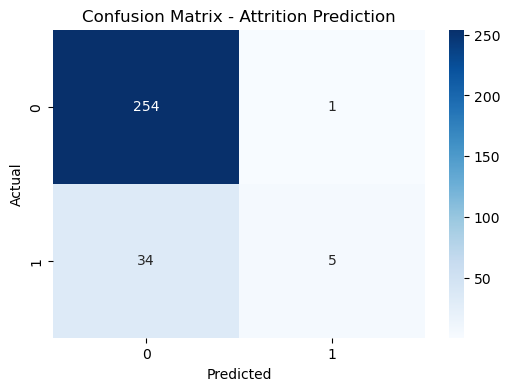

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Attrition Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

In [27]:
print("\n===== TOP 10 FACTORS AFFECTING ATTRITION =====")
print(importance.head(10))


===== TOP 10 FACTORS AFFECTING ATTRITION =====
MonthlyIncome         0.078212
OverTime              0.066669
Age                   0.061569
DailyRate             0.054087
TotalWorkingYears     0.052491
MonthlyRate           0.048373
HourlyRate            0.047369
DistanceFromHome      0.045999
YearsAtCompany        0.041347
NumCompaniesWorked    0.037951
dtype: float64


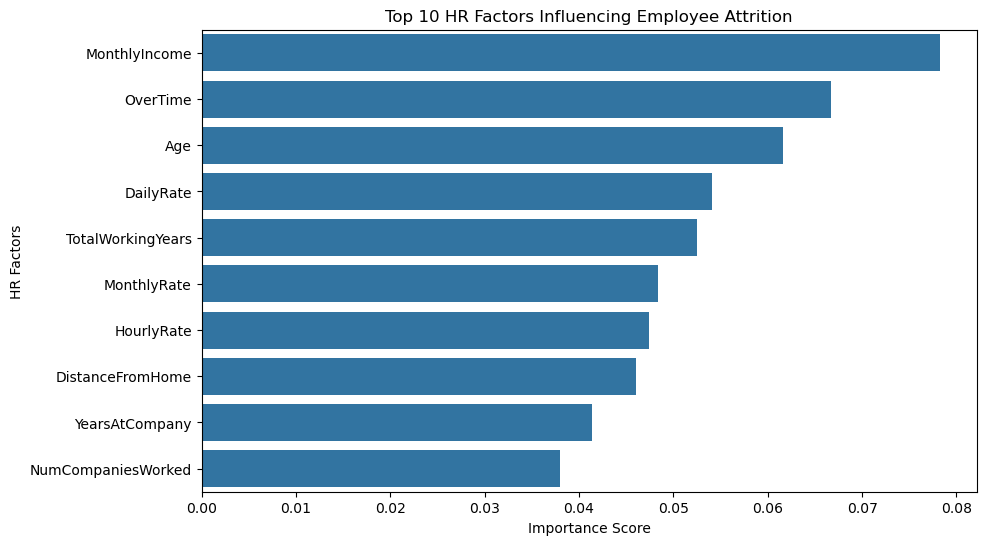

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance.head(10), y=importance.head(10).index)
plt.title("Top 10 HR Factors Influencing Employee Attrition")
plt.xlabel("Importance Score")
plt.ylabel("HR Factors")
plt.show()

In [36]:
sample_employee = X_test.iloc[[1]]  
prediction = model.predict(sample_employee)

In [37]:
print("\n===== SAMPLE EMPLOYEE PREDICTION =====")
if prediction[0] == 1:
    print("Prediction: Employee is likely to LEAVE (Attrition = Yes)")
else:
    print("Prediction: Employee is likely to STAY (Attrition = No)")


===== SAMPLE EMPLOYEE PREDICTION =====
Prediction: Employee is likely to STAY (Attrition = No)


In [38]:
sample_employees = X_test.iloc[0:5]
predictions = model.predict(sample_employees)
print(predictions)

[0 0 1 0 0]
